In [1]:
# 2.6.1. Basic Probability Theory
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [2]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 0., 1., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 3., 3., 1., 0., 3.])

In [4]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1500, 0.1720, 0.1780, 0.1630, 0.1660, 0.1710])

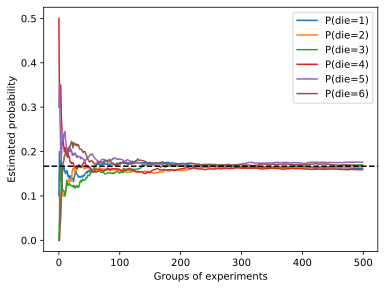

In [5]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();